# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import time

C:\Users\Prabodh\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def plot_roc(y_test, pred):
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [3]:
df = pd.read_csv("final_aggregated_dataset.csv")
X = df.drop(columns={"address", "class", "min_delay","mean_delay", "median_delay"})
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Without SMOTE

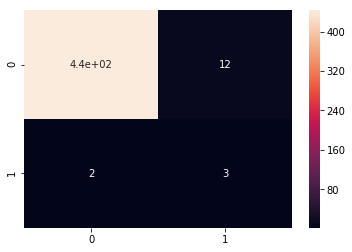

In [4]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

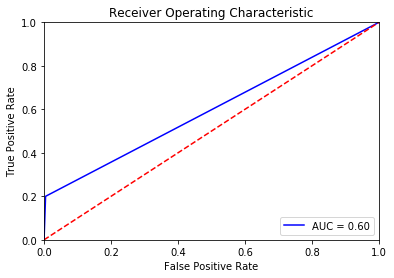

In [5]:
plot_roc(y_test, pred)

## With SMOTE

In [6]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

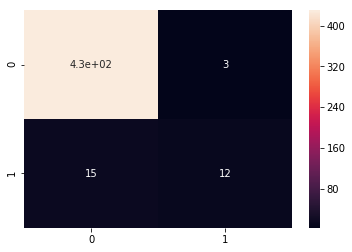

In [7]:
pred = rf.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

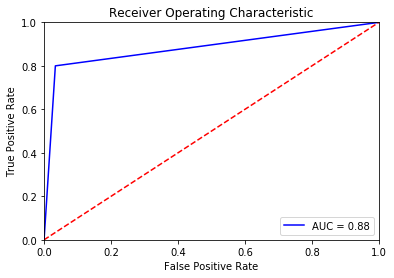

In [8]:
plot_roc(y_test, pred)

In [9]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}

## Grid Search

In [10]:
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3, n_jobs=-1)
start_time = time.time()
grid_result = grid.fit(X_train, y_train)
print("Best:", grid_result.best_score_, " using ", grid_result.best_params_)
print("Execution time:", time.time() - start_time, " ms")

Best: 0.9704558244231851  using  {'max_features': 3, 'max_depth': 110, 'n_estimators': 100, 'bootstrap': True, 'min_samples_split': 8, 'min_samples_leaf': 3}
Execution time: 700.9087808132172  ms


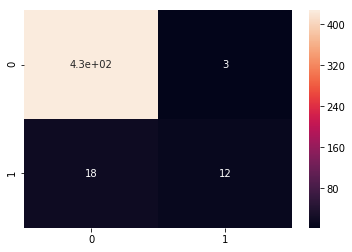

In [11]:
rf = RandomForestClassifier(bootstrap=True, 
                            max_depth=110, 
                            max_features=3, 
                            min_samples_leaf=3, 
                            min_samples_split=8, 
                            n_estimators=100,
                           n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True)

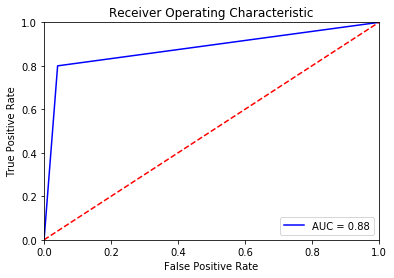

In [12]:
plot_roc(y_test, pred)